# 1D Linear Regression for Weather dataset

The [Shanghai AQI and Wheather dataset from 2014-2021](https://www.kaggle.com/code/kerneler/starter-shanghai-air-pollution-and-7c6ab44f-e/data) is used in this notebook.

Regression Mechanics:

y = ax + b

where,

* y = target
* x = single feature
* a, b = parameters (slope and intercept)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [14]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/erhankul/shanghai-air-pollution-and-wheather-20142021")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phctuynl
Your Kaggle Key: ··········


100%|██████████| 175k/175k [00:00<00:00, 49.4MB/s]

In [ ]:
df = pd.read_csv("shanghai-air-pollution-and-wheather-20142021/Shanghai AQI and Wheather 2014-2021.csv")
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [ ]:
df.tail()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
date,,,,,,,,,,,,,,,,,,,,,
2021-01-26,2021-01-26,12.0,10.0,0.0,4.0,3.0,88.0,7.0,10.0,11.0,...,91.0,77.0,1.1,1023.0,12.0,8.0,233.0,9.0,229.0,Very unhealthy
2021-01-27,2021-01-27,11.0,7.0,0.0,8.7,2.0,96.0,4.0,7.0,9.0,...,55.0,72.0,0.0,1024.0,11.0,10.0,49.0,11.0,200.0,Unhealthy
2021-01-28,2021-01-28,10.0,4.0,0.0,8.7,3.0,100.0,-5.0,5.0,8.0,...,16.0,44.0,0.0,1028.0,10.0,10.0,291.0,19.0,309.0,Hazardous
2021-01-29,2021-01-29,9.0,6.0,0.0,8.7,3.0,90.0,-9.0,5.0,7.0,...,0.0,32.0,0.0,1030.0,9.0,10.0,188.0,10.0,320.0,Hazardous
2021-01-30,2021-01-30,13.0,5.0,0.0,8.7,4.0,82.0,0.0,8.0,9.0,...,5.0,56.0,0.0,1027.0,13.0,10.0,159.0,10.0,162.0,Unhealthy


In [ ]:
df.columns

Index(['date', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'AQI', 'AQI_Explained'],
      dtype='object')

In [ ]:
import seaborn as sns

In [8]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2502 entries, 2014-01-01 to 2021-01-30
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2502 non-null   object 
 1   maxtempC           2502 non-null   float64
 2   mintempC           2502 non-null   float64
 3   totalSnow_cm       2502 non-null   float64
 4   sunHour            2502 non-null   float64
 5   uvIndex            2502 non-null   float64
 6   moon_illumination  2502 non-null   float64
 7   DewPointC          2502 non-null   float64
 8   FeelsLikeC         2502 non-null   float64
 9   HeatIndexC         2502 non-null   float64
 10  WindChillC         2502 non-null   float64
 11  WindGustKmph       2502 non-null   float64
 12  cloudcover         2502 non-null   float64
 13  humidity           2502 non-null   float64
 14  precipMM           2502 non-null   float64
 15  pressure           2502 non-null   float64
 16  tempC         

In [17]:
df['totalSnow_cm']

date
2014-01-01    0.0
2014-01-02    0.0
2014-01-03    0.0
2014-01-04    0.0
2014-01-05    0.0
             ... 
2021-01-26    0.0
2021-01-27    0.0
2021-01-28    0.0
2021-01-29    0.0
2021-01-30    0.0
Name: totalSnow_cm, Length: 2502, dtype: float64

In [9]:
df.AQI_Explained.unique()

array(['Hazardous', 'Very unhealthy', 'Unhealthy',
       'Unhealthy for sensitive groups', 'Moderate'], dtype=object)

In [21]:
# add date in index
df.index = df.date

# Regression equation between Heat Index and Air Quality Index
X = df.drop(['AQI', 'AQI_Explained','date','totalSnow_cm'], axis = 1)
y = df['AQI']

In [31]:
# Train and test dataset (80% training dataset and 20% test dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
X_train.head()

array([[ 0.08608513,  0.38643238, -0.27534459, ...,  0.35707629,
        -1.33285717, -0.37220277],
       [ 0.90915304,  1.00871726,  0.74750538, ..., -0.42295608,
        -0.34313263, -0.59235581],
       [ 1.61463981,  1.63100215,  1.22696631, ...,  0.35707629,
        -0.94217643, -1.03266189],
       ...,
       [-0.03149599, -0.11139552, -0.4351649 , ...,  0.35707629,
         0.81588691, -0.37220277],
       [ 0.08608513,  0.38643238, -1.17033832, ..., -0.42295608,
        -0.72079068, -0.81250885],
       [ 1.26189642,  1.50654517,  0.81143351, ..., -0.42295608,
         0.36009271, -0.15204973]])

In [32]:
# Linear regression model from sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print('Accuracy: {}'.format(score))

Accuracy: 0.2665086411585814


## Regression metrices

1. RMSE
2. R-Squared

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)

print("R square: ", r2, "\n RMSE: ", mse)

R square:  0.2665086411585814 
 RMSE:  65.0140630154617


### Plot the regression line with test dataset

ValueError: ignored

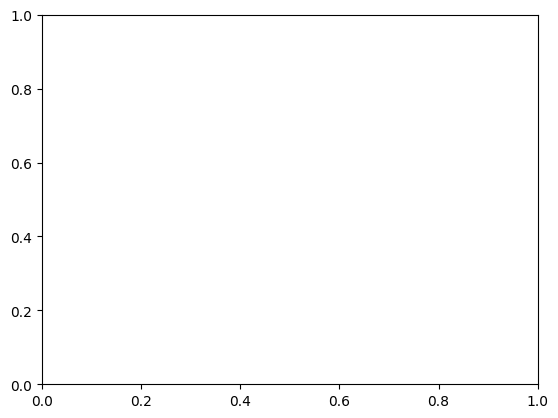

In [12]:
pred = lr.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color='red')
plt.xlabel("Heat Index (C)")
plt.ylabel("Air Quality Index")

### Regression Equation

In [ ]:
a = lr.coef_
b = lr.intercept_

print(f'Regression Equation: y = {a[0][0]}x + {b[0]}')

# Multi-dimensional linear regression

y = a1x1 + a2x1 + a3x3 + ....... + anxn + b

Where,

* y = target
* x1, x2, x3 ... = features
* a1, a2, a3 ..., b = parameters (slope and coefficients)

**R square:** It quantifies the variance in target values (value ranges from 0 to 1)

In [ ]:
# add date in index
df.index = df.date

# Regression equation between Heat Index and Air Quality Index
X = df.drop(columns=['AQI', 'AQI_Explained', 'date'])
y = df['AQI']

# Train and test dataset (80% training dataset and 20% test dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Linear regression model from sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print('Accuracy: {}'.format(score))

# Cross validation

* To test the ability of ML model to predict new data
* Used to give the insight on how model generalize to an independent dataset

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()
cv_results = cross_val_score(lr, X, y, cv=kf)
cv_results

In [ ]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

# Regularization

Lets say, the regression equation as below,

Y ≈ β0 + β1X1 + β2X2 + …+ βpXp

The loss function also know as residual sum of square or RSS equation for above regression equation will be,

![Regression equation loss function](./img/loss_reg_eqation.webp)

Used to avoid overfitting. There are two types of regularization in machine learning.

### 1. Ridge Regression

![Ridge equation](./img/redge_equation.webp)

### 2. Lasso Regression

It can select only the important features. It srinks the coefficient of less important features to zero. The Lasso regression function also can be used for feature selection.

![Lasso equation](./img/lasso_equation.webp)



In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

    # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)

    # Fit the data
    ridge.fit(X_train, y_train)

    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

print(ridge_scores)

# Feature selection

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

columns = df.drop(columns=['AQI', "AQI_Explained", 'date']).columns

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_

print(lasso_coef)
print(columns)
plt.bar(columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()